In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy

import pandas as pd
import scorecardpy as sc

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

In [2]:
x_train = pd.read_csv("X_train.csv")
x_valid = pd.read_csv("X_valid.csv")

y_train = pd.read_csv("y_train.csv")
y_valid = pd.read_csv("y_valid.csv")

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((54315, 59), (9586, 59), (54315, 1), (9586, 1))

In [3]:
def calcular_pesos(modelo):
    coef_model = pd.DataFrame(modelo.tvalues,columns=['t_value'])
    coef_model['t_value2'] = np.power(coef_model['t_value'],2)
    coef_model['total'] = sum(coef_model['t_value2'])
    coef_model['part'] = coef_model['t_value2'] / coef_model['total']
    coef_model['pesos'] = coef_model['part'] * 100
    return coef_model['pesos'].sort_values(ascending=True)



### >> Modleo TOP IV

In [4]:
cols_aporte = [
     'autocontrol_x_confianza_entre_tiempo_empleo',
     'saldo_cuenta_x_confianza_entre_tiempo_empleo',
     'autocontrol_x_impulsividad_entre_tiempo_empleo',
     'valor_prestamo_x_saldo_cuenta',
     'valor_prestamo_x_impulsividad_entre_tiempo_empleo',
     'saldo_cuenta_x_autocontrol',
     'Saldo_cuenta',
     'tiempo_empleo_x_impulsividad_entre_cuentas_otros',
     'valor_prestamo_x_autocontrol_entre_tiempo_empleo',
     'valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo',
     'impulsividad_x_confianza_entre_tiempo_empleo',
     'cuentas_otros_x_autocontrol_entre_tiempo_empleo',
     'cuentas_otros_x_impulsividad_entre_tiempo_empleo'
]

In [5]:
x_train['target'] = y_train.values
matriz_corr = x_train[cols_aporte + ['target']].corr(method='pearson')

matriz_corr.style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,autocontrol_x_confianza_entre_tiempo_empleo,saldo_cuenta_x_confianza_entre_tiempo_empleo,autocontrol_x_impulsividad_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta,valor_prestamo_x_impulsividad_entre_tiempo_empleo,saldo_cuenta_x_autocontrol,Saldo_cuenta,tiempo_empleo_x_impulsividad_entre_cuentas_otros,valor_prestamo_x_autocontrol_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,impulsividad_x_confianza_entre_tiempo_empleo,cuentas_otros_x_autocontrol_entre_tiempo_empleo,cuentas_otros_x_impulsividad_entre_tiempo_empleo,target
autocontrol_x_confianza_entre_tiempo_empleo,1.00000,0.14533,0.93018,-0.00328,0.78968,0.00625,-0.00269,-0.17761,0.84778,0.14250,0.93212,0.57262,0.53352,-0.00017
saldo_cuenta_x_confianza_entre_tiempo_empleo,0.14533,1.00000,0.13475,0.46674,0.11634,0.62795,0.59896,-0.02473,0.12113,0.86892,0.14148,0.07832,0.07417,-0.00394
autocontrol_x_impulsividad_entre_tiempo_empleo,0.93018,0.13475,1.00000,-0.00340,0.84830,0.00771,-0.00133,-0.16117,0.84610,0.13934,0.93095,0.57157,0.57289,-0.00092
valor_prestamo_x_saldo_cuenta,-0.00328,0.46674,-0.00340,1.00000,0.01759,0.86153,0.89351,0.00227,0.01925,0.56631,-0.00525,-0.00164,-0.00402,-0.00645
valor_prestamo_x_impulsividad_entre_tiempo_empleo,0.78968,0.11634,0.84830,0.01759,1.00000,-0.00208,-0.00449,-0.14548,0.93780,0.16035,0.84508,0.48348,0.51664,0.00149
saldo_cuenta_x_autocontrol,0.00625,0.62795,0.00771,0.86153,-0.00208,1.00000,0.98066,0.00298,0.00581,0.56201,-0.00151,0.00369,-0.00251,-0.00743
Saldo_cuenta,-0.00269,0.59896,-0.00133,0.89351,-0.00449,0.98066,1.00000,0.00345,-0.00261,0.53292,-0.00403,-0.00253,-0.00472,-0.00716
tiempo_empleo_x_impulsividad_entre_cuentas_otros,-0.17761,-0.02473,-0.16117,0.00227,-0.14548,0.00298,0.00345,1.00000,-0.16040,-0.02702,-0.16117,-0.03533,-0.02241,-0.00043
valor_prestamo_x_autocontrol_entre_tiempo_empleo,0.84778,0.12113,0.84610,0.01925,0.93780,0.00581,-0.00261,-0.16040,1.00000,0.16676,0.78519,0.52099,0.48258,0.00010
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,0.14250,0.86892,0.13934,0.56631,0.16035,0.56201,0.53292,-0.02702,0.16676,1.00000,0.13610,0.08792,0.08118,-0.00574


In [6]:
pd.DataFrame(matriz_corr['target'].abs().sort_values(ascending=False)).style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,target
target,1.00000
saldo_cuenta_x_autocontrol,0.00743
Saldo_cuenta,0.00716
valor_prestamo_x_saldo_cuenta,0.00645
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,0.00574
saldo_cuenta_x_confianza_entre_tiempo_empleo,0.00394
cuentas_otros_x_impulsividad_entre_tiempo_empleo,0.00152
valor_prestamo_x_impulsividad_entre_tiempo_empleo,0.00149
autocontrol_x_impulsividad_entre_tiempo_empleo,0.00092
impulsividad_x_confianza_entre_tiempo_empleo,0.00053


In [7]:
matriz_corr = x_train[cols_aporte + ['target']].corr(method='spearman')

matriz_corr.style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,autocontrol_x_confianza_entre_tiempo_empleo,saldo_cuenta_x_confianza_entre_tiempo_empleo,autocontrol_x_impulsividad_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta,valor_prestamo_x_impulsividad_entre_tiempo_empleo,saldo_cuenta_x_autocontrol,Saldo_cuenta,tiempo_empleo_x_impulsividad_entre_cuentas_otros,valor_prestamo_x_autocontrol_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,impulsividad_x_confianza_entre_tiempo_empleo,cuentas_otros_x_autocontrol_entre_tiempo_empleo,cuentas_otros_x_impulsividad_entre_tiempo_empleo,target
autocontrol_x_confianza_entre_tiempo_empleo,1.00000,0.60018,0.95470,-0.00655,0.77150,0.01728,-0.00179,0.08252,0.80698,0.50962,0.95451,0.48075,0.46420,0.00002
saldo_cuenta_x_confianza_entre_tiempo_empleo,0.60018,1.00000,0.58752,0.52606,0.51362,0.65296,0.65698,0.20156,0.51246,0.84420,0.60151,0.34002,0.34056,-0.00354
autocontrol_x_impulsividad_entre_tiempo_empleo,0.95470,0.58752,1.00000,-0.00395,0.80738,0.02010,0.00109,0.09759,0.80747,0.51177,0.95444,0.48083,0.48061,-0.00060
valor_prestamo_x_saldo_cuenta,-0.00655,0.52606,-0.00395,1.00000,0.24650,0.80159,0.80612,0.00177,0.24554,0.71250,-0.00714,-0.00069,-0.00047,-0.00558
valor_prestamo_x_impulsividad_entre_tiempo_empleo,0.77150,0.51362,0.80738,0.24650,1.00000,0.00353,0.00271,0.10720,0.96714,0.70943,0.80579,0.40210,0.41485,0.00045
saldo_cuenta_x_autocontrol,0.01728,0.65296,0.02010,0.80159,0.00353,1.00000,0.99383,0.00002,0.01746,0.53259,-0.00013,0.00580,-0.00062,-0.00702
Saldo_cuenta,-0.00179,0.65698,0.00109,0.80612,0.00271,0.99383,1.00000,-0.00007,0.00146,0.53533,-0.00032,-0.00110,-0.00044,-0.00680
tiempo_empleo_x_impulsividad_entre_cuentas_otros,0.08252,0.20156,0.09759,0.00177,0.10720,0.00002,-0.00007,1.00000,0.09377,0.19138,0.09823,0.67217,0.68209,0.00100
valor_prestamo_x_autocontrol_entre_tiempo_empleo,0.80698,0.51246,0.80747,0.24554,0.96714,0.01746,0.00146,0.09377,1.00000,0.70844,0.76987,0.41386,0.40029,0.00070
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,0.50962,0.84420,0.51177,0.71250,0.70943,0.53259,0.53533,0.19138,0.70844,1.00000,0.50905,0.30232,0.30247,-0.00225


In [8]:
pd.DataFrame(matriz_corr['target'].abs().sort_values(ascending=False)).style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,target
target,1.00000
saldo_cuenta_x_autocontrol,0.00702
Saldo_cuenta,0.00680
valor_prestamo_x_saldo_cuenta,0.00558
saldo_cuenta_x_confianza_entre_tiempo_empleo,0.00354
cuentas_otros_x_autocontrol_entre_tiempo_empleo,0.00274
cuentas_otros_x_impulsividad_entre_tiempo_empleo,0.00233
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,0.00225
impulsividad_x_confianza_entre_tiempo_empleo,0.00111
tiempo_empleo_x_impulsividad_entre_cuentas_otros,0.00100


In [9]:
del x_train['target']

In [10]:
import statsmodels.api as sm

logit_model_2 = sm.Logit(y_train , x_train[cols_aporte])
result_2 = logit_model_2.fit()

Optimization terminated successfully.
         Current function value: 0.495291
         Iterations 9


In [11]:
calcular_pesos(result_2)

valor_prestamo_x_saldo_cuenta                         0.001425
cuentas_otros_x_autocontrol_entre_tiempo_empleo       0.007157
valor_prestamo_x_impulsividad_entre_tiempo_empleo     0.035209
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo     0.069097
saldo_cuenta_x_autocontrol                            0.096154
cuentas_otros_x_impulsividad_entre_tiempo_empleo      0.227812
valor_prestamo_x_autocontrol_entre_tiempo_empleo      0.249088
autocontrol_x_confianza_entre_tiempo_empleo           0.436484
autocontrol_x_impulsividad_entre_tiempo_empleo        0.562289
impulsividad_x_confianza_entre_tiempo_empleo          0.725573
saldo_cuenta_x_confianza_entre_tiempo_empleo          1.457792
Saldo_cuenta                                          1.730081
tiempo_empleo_x_impulsividad_entre_cuentas_otros     94.401837
Name: pesos, dtype: float64

In [12]:
result_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Logit
=======================================================================================================
Model:                            Logit                        Pseudo R-squared:             -0.217    
Dependent Variable:               Incumplimiento               AIC:                          53829.4131
Date:                             2021-06-05 19:11             BIC:                          53945.1464
No. Observations:                 54315                        Log-Likelihood:               -26902.   
Df Model:                         12                           LL-Null:                      -22109.   
Df Residuals:                     54302                        LLR p-value:                  1.0000    
Converged:                        1.0000                       Scale:                        1.0000    
No. Iterations:                   9.0000                                                               
-------------------------------------------------------------------------------------------------------
                                                    Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
-------------------------------------------------------------------------------------------------------
autocontrol_x_confianza_entre_tiempo_empleo         -2.7751   0.9144  -3.0350 0.0024   -4.5672  -0.9830
saldo_cuenta_x_confianza_entre_tiempo_empleo        47.7420   8.6075   5.5466 0.0000   30.8717  64.6123
autocontrol_x_impulsividad_entre_tiempo_empleo      -1.6500   0.4790  -3.4447 0.0006   -2.5889  -0.7112
valor_prestamo_x_saldo_cuenta                        2.6354  15.1957   0.1734 0.8623  -27.1477  32.4185
valor_prestamo_x_impulsividad_entre_tiempo_empleo    0.7446   0.8638   0.8620 0.3887   -0.9484   2.4377
saldo_cuenta_x_autocontrol                          19.6376  13.7856   1.4245 0.1543   -7.3817  46.6568
Saldo_cuenta                                      -125.8246  20.8235  -6.0424 0.0000 -166.6381 -85.0112
tiempo_empleo_x_impulsividad_entre_cuentas_otros    -6.7760   0.1518 -44.6342 0.0000   -7.0735  -6.4784
valor_prestamo_x_autocontrol_entre_tiempo_empleo    -2.0238   0.8827  -2.2927 0.0219   -3.7539  -0.2937
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo    7.5323   6.2377   1.2076 0.2272   -4.6933  19.7580
impulsividad_x_confianza_entre_tiempo_empleo        -3.5619   0.9102  -3.9131 0.0001   -5.3459  -1.7778
cuentas_otros_x_autocontrol_entre_tiempo_empleo     -0.3802   0.9781  -0.3886 0.6975   -2.2973   1.5370
cuentas_otros_x_impulsividad_entre_tiempo_empleo     2.4247   1.1059   2.1926 0.0283    0.2573   4.5922
=======================================================================================================

"""

In [13]:
import numpy as np
#prediciendo en base al modelo 
y_pred_prob_2_train = result_2.predict(x_train[cols_aporte])
y_pred_class_2_train = np.where(y_pred_prob_2_train < 0.5, 0 , 1)

y_pred_prob_2_valid = result_2.predict(x_valid[cols_aporte])
y_pred_class_2_valid = np.where(y_pred_prob_2_valid < 0.5, 0 , 1)

<AxesSubplot:>

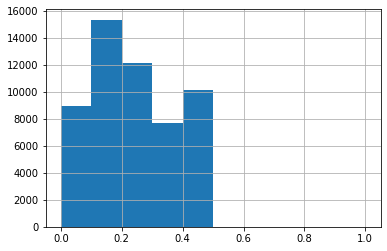

In [14]:
y_pred_prob_2_train.hist()

<AxesSubplot:>

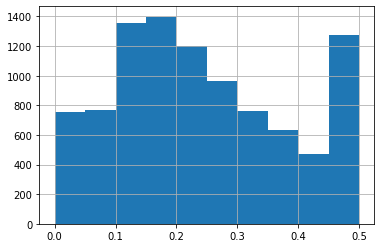

In [15]:
y_pred_prob_2_valid.hist()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

print("/"*25, 'TRAIN')
auc = roc_auc_score(y_train, y_pred_prob_2_train)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

print("/"*25, 'VALIDATION')
auc_2 = roc_auc_score(y_valid, y_pred_prob_2_valid)
print("AUC: %1.3f" % auc_2)
print("GINI: %1.3f" % (2*auc_2-1))

///////////////////////// TRAIN
AUC: 0.502
GINI: 0.005
///////////////////////// VALIDATION
AUC: 0.481
GINI: -0.037


In [17]:
print("/"*25, 'TRAIN')
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_2_train))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_2_train))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_2_train))

print("/"*25, 'VALIDATION')
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_2_valid))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_2_valid))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_2_valid))

///////////////////////// TRAIN
RECALL     : 0.00013043
EFECTIVIDAD: 0.20000000
F1 SCORE   : 0.00026069
///////////////////////// VALIDATION
RECALL     : 0.00000000
EFECTIVIDAD: 0.00000000
F1 SCORE   : 0.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### >>> RECALL

In [18]:
from scipy.optimize import differential_evolution


optimization_rec = differential_evolution(
    lambda c: -1*recall_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_2_train])), 
    [(0, 1)]
)
optimization_rec

     fun: -0.9992174253293336
 message: 'Optimization terminated successfully.'
    nfev: 212
     nit: 13
 success: True
       x: array([3.27700786e-05])

In [19]:
corte_rec = optimization_rec['x'][0]
corte_rec

3.27700785932028e-05

In [20]:
y_pred_class_train_2_rec = np.where(y_pred_prob_2_train < corte_rec, 0 , 1)
y_pred_class_valid_2_rc = np.where(y_pred_prob_2_valid < corte_rec, 0 , 1)

In [21]:
pd.Series(y_pred_class_train_2_rec).value_counts()

1    54259
0       56
dtype: int64

In [22]:
pd.Series(y_pred_class_valid_2_rc).value_counts()

1    9576
0      10
dtype: int64

In [23]:
print("/"*25, "TRAIN")
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train_2_rec))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train_2_rec))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train_2_rec))

print("/"*25, "VALIDATION")
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid_2_rc))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid_2_rc))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid_2_rc))

///////////////////////// TRAIN
RECALL     : 0.99921743
EFECTIVIDAD: 0.14119317
F1 SCORE   : 0.24742435
///////////////////////// VALIDATION
RECALL     : 0.99852180
EFECTIVIDAD: 0.14108187
F1 SCORE   : 0.24723213


#### >>> EFECTIVIDAD

In [24]:
optimization_pre = differential_evolution(
    lambda c: -1*precision_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_2_train])), 
    [(0, 1)]
)
optimization_pre

     fun: -0.5
 message: 'Optimization terminated successfully.'
    nfev: 182
     nit: 11
 success: True
       x: array([0.99821138])

#### >>> AUC

In [25]:
optimization_auc = differential_evolution(
    lambda c: -1*roc_auc_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_2_train])), 
    [(0, 1)]
)
optimization_auc

     fun: -0.5034977009492425
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 1
 success: True
       x: array([0.24060556])

In [26]:
corte_auc = optimization_auc['x'][0]
corte_auc

0.24060556085244933

In [27]:
y_pred_class_train_2_auc = np.where(y_pred_prob_2_train < corte_auc, 0 , 1)
y_pred_class_valid_2_auc = np.where(y_pred_prob_2_valid < corte_auc, 0 , 1)

In [28]:
pd.Series(y_pred_class_train_2_auc).value_counts()

0    29811
1    24504
dtype: int64

In [29]:
pd.Series(y_pred_class_valid_2_auc).value_counts()

0    5259
1    4327
dtype: int64

In [30]:
print("/"*25, "TRAIN")
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train_2_auc))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train_2_auc))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train_2_auc))

print("/"*25, "VALIDATION")
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid_2_auc))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid_2_auc))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid_2_auc))

///////////////////////// TRAIN
RECALL     : 0.45715404
EFECTIVIDAD: 0.14303787
F1 SCORE   : 0.21789811
///////////////////////// VALIDATION
RECALL     : 0.42867701
EFECTIVIDAD: 0.13404206
F1 SCORE   : 0.20422535
